# **Counting Circles, Ellipses and Finding Waldo**

**In this lesson we'll learn:**
1. Mini Project on Counting Circular Blobs
2. Mini Project on using Template Matching to find Waldo


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(image = None,title = "",  size = 10):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)



## **Counting Circular Blobs**

![](https://i.stack.imgur.com/zYL2C.jpg)
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/simpleblob.png)

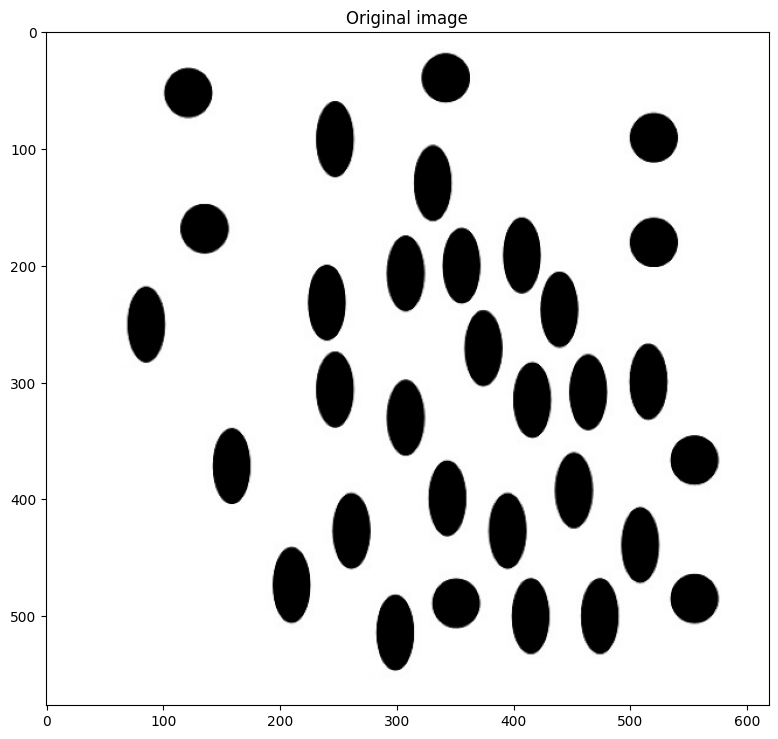

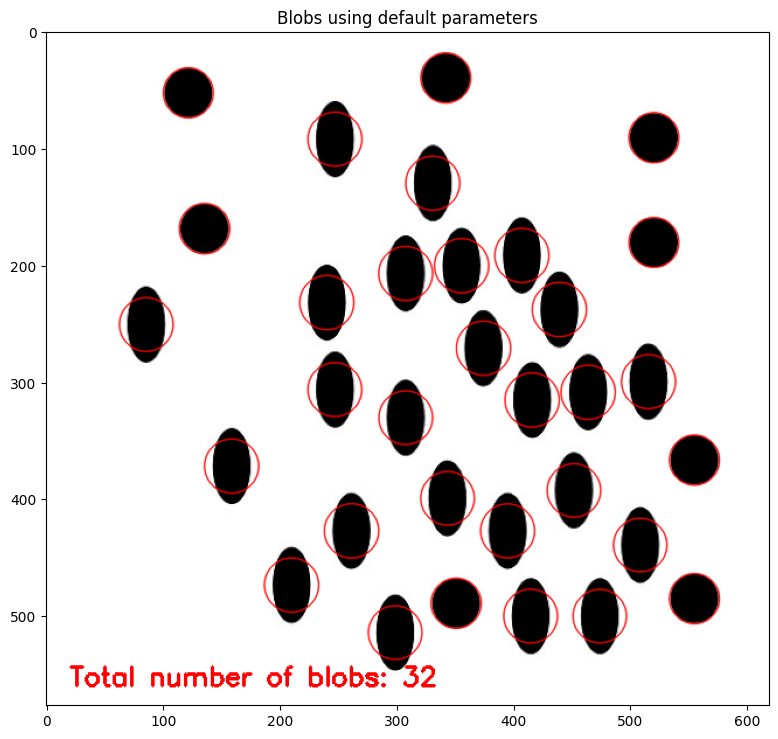

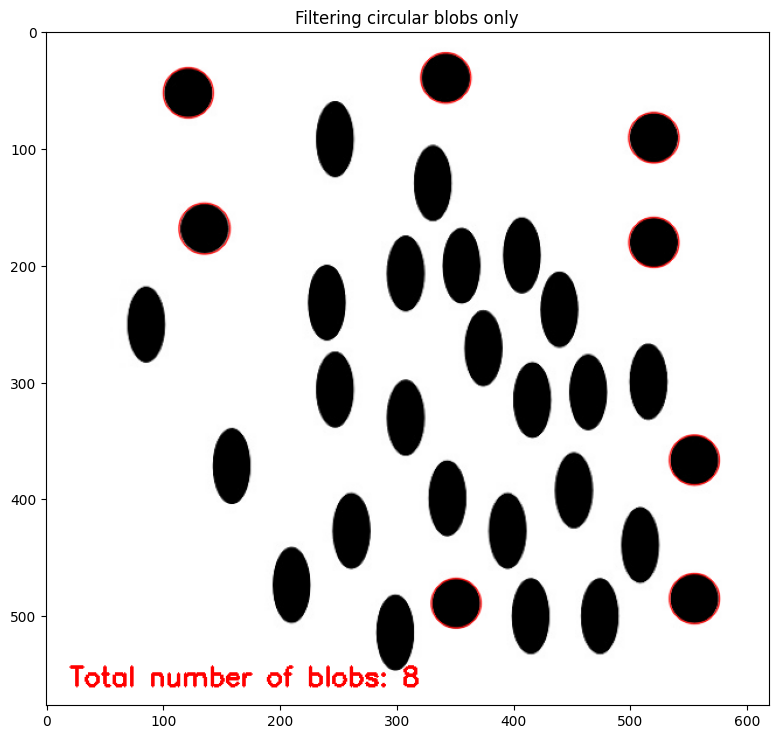

In [49]:
# Load image
image= cv2.imread('images/blobs.png')
imshow(image, 'Original image')

# Intialize the detector using the default parameters
detector= cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints= detector.detect(image)

# Draw blobs on our image as red circles
blank= np.zeros((1,1))
blobs= cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs= len(keypoints)
text= 'Total number of blobs: ' + str(len(keypoints))
cv2.putText(blobs, text, (20, 560), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 2)

imshow(blobs, 'Blobs using default parameters')



# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params= cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea= False
params.minArea= 100

# Set Circularity filtering parameters
params.filterByCircularity= True
params.minCircularity= 0.9

# Set Convexity filtering parameters
params.filterByConvexity= False
params.minConvexity= 0.2

# Set inertia filtering parameters
params.filterByInertia= True
params.minInertiaRatio= 0.1

# Create a detector with the parameters
detector= cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints= detector.detect(image)

# Draw blobs on our image as red circles
blank= np.zeros((1,1))
blobs= cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_og_blobs= len(keypoints)
text= 'Total number of blobs: ' + str(len(keypoints))
cv2.putText(blobs, text, (20,560), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 2)

imshow(blobs, 'Filtering circular blobs only')


In [3]:
detector, type(detector)

(< cv2.SimpleBlobDetector 0x738f20f5f830>, cv2.SimpleBlobDetector)

In [4]:
blobs.shape

(577, 619, 3)

In [5]:
image.shape

(577, 619, 3)

In [6]:
len(keypoints)

32

In [7]:
text

'Total number of blobs: 32'

In [8]:
params.filterByCircularity, params.minCircularity

(False, 0.800000011920929)

In [20]:
params.filterByArea, params.minArea

(False, 100.0)

## **Finding Waldo Using Template Matching**

**Notes on Template Matching**

There are a variety of methods to perform template matching, but in this case we are using the "correlation coefficient" which is specified by the flag `cv2.TM_CCOEFF`.

So what exactly is the `cv2.matchTemplate` function doing?

Essentially, this function takes a "sliding window" of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to `cv2.minMaxLoc` to find where our “good” matches are.
That’s really all there is to template matching!

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      

In [1]:
template= cv2.imread('images/waldo.png')
imshow(template, 'Template', 5)

NameError: name 'cv2' is not defined

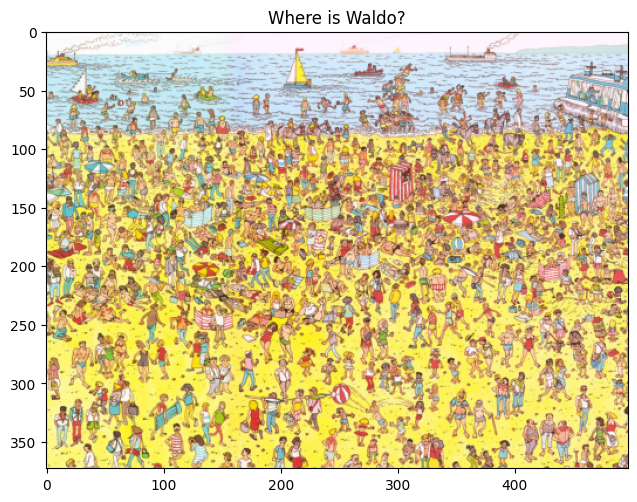

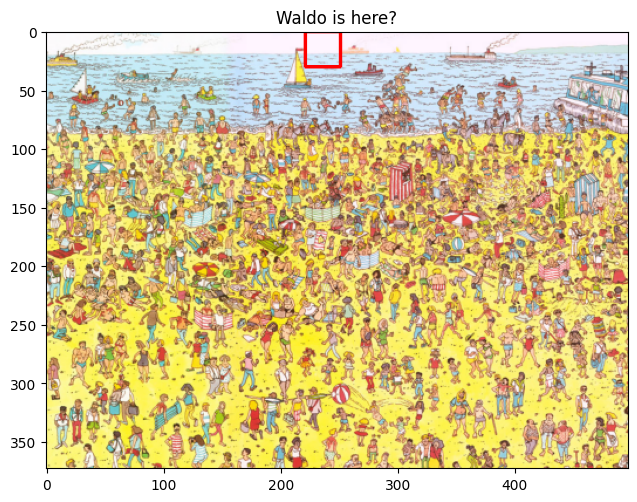

In [14]:
# Load input image and convert to grayscale
image= cv2.imread('images/waldo_beach.png')
imshow(image, 'Where is Waldo?')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imshow(gray, 'Gray')

# Load Template image
template= cv2.imread('images/waldo.png', 0)
#imshow(template, 'Waldo grayscale')

results= cv2.matchTemplate(gray, template, cv2.TM)
min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(results)

#Create Bounding Box
top_left= max_loc
bottom_right= (top_left[0] + 30, top_left[1] + 30)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 2)

imshow(image, 'Waldo is here?')

In [94]:
gray.shape

(373, 497)

In [95]:
template.shape

(30, 30)

In [98]:
results.shape

(344, 468)

In [99]:
min_val, max_val, min_loc, max_loc

(-711446.8125, 1783471.5, (173, 326), (229, 119))

In [104]:
gray[0]

array([249, 248, 249, 252, 251, 251, 250, 250, 251, 252, 252, 252, 252,
       252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 252, 253,
       253, 253, 252, 251, 251, 251, 252, 253, 252, 252, 251, 251, 251,
       251, 251, 252, 252, 251, 251, 251, 249, 249, 249, 250, 251, 251,
       251, 250, 249, 248, 247, 246, 244, 243, 243, 244, 244, 243, 243,
       233, 225, 225, 230, 230, 246, 240, 221, 235, 243, 244, 245, 243,
       238, 240, 244, 244, 244, 242, 244, 244, 244, 245, 244, 244, 244,
       245, 245, 245, 245, 245, 245, 245, 245, 246, 249, 251, 252, 251,
       251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252,
       252, 251, 251, 251, 252, 252, 252, 252, 252, 251, 251, 252, 250,
       249, 250, 252, 252, 251, 252, 252, 252, 251, 252, 252, 252, 252,
       251, 250, 251, 251, 251, 250, 250, 250, 249, 249, 249, 249, 249,
       249, 248, 247, 247, 248, 248, 248, 248, 248, 248, 248, 248, 248,
       248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 24

In [105]:
results[0]

array([367114.66  , 386769.2   , 362050.38  , 306235.38  , 287893.5   ,
       287280.03  , 254657.36  , 212098.72  , 182175.81  , 169944.    ,
       128871.97  ,  76989.63  ,  33058.105 ,  31652.77  ,  30740.96  ,
        63317.406 , 102679.07  ,  89323.734 ,  89364.08  ,  81935.25  ,
        81193.766 ,  64622.56  ,  63778.52  ,  50049.137 ,  48292.58  ,
        70317.836 ,  67984.04  ,  75444.164 ,  75786.41  ,  76038.7   ,
        61902.562 ,  60449.926 ,  68154.76  ,  72468.09  ,  60819.04  ,
        58517.93  ,  61456.25  ,  52789.285 ,  59325.09  ,  59929.152 ,
        51816.69  ,  43122.55  ,  54975.31  ,  64055.617 ,  57838.17  ,
        49718.926 ,  55088.773 ,  46060.105 ,  34603.32  ,  52527.84  ,
        67788.62  ,  62591.777 ,  43856.28  ,  23295.102 ,  22120.457 ,
        26793.355 ,  40114.523 ,  56270.457 ,  60731.03  ,  58997.14  ,
        46280.348 ,  60597.418 ,  66101.52  ,  74877.125 ,  77037.836 ,
        76827.76  ,  76004.2   ,  79663.984 ,  71276.27  ,  6932